# 이커머스 데이터

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
# 데이터 불러오고 전처리하기
user_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv"
user_statsdata_url ="https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv"

user_metadata_df = pd.read_csv(user_metadata_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])

In [3]:
user_metadata_df.shape, user_stats_df.shape

((3412, 10), (3412, 11))

In [4]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2


In [5]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


In [6]:
user_metadata_df.dtypes

user_id             object
sex                  int64
birthday_year        int64
membership_type      int64
category_prefer      int64
joined_date         object
deleted_date        object
join_path          float64
os                  object
recommended_cnt      int64
dtype: object

In [7]:
# 생일년도 사용하여 2021년 기준 고객 나이정보 생성하기
this_year = 2021
user_metadata_df["age"] = this_year - user_metadata_df["birthday_year"] + 1
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23


In [8]:
# 가입일자 사용하여 2021년 1월 1일 기준 고객 가입기간 생성하기
today_ymd=datetime(2021, 1, 1)

# 가입일자(object) -> 날짜형식 변경
user_metadata_df["joined_date"] = user_metadata_df["joined_date"].astype("datetime64[ns]")

user_metadata_df["days_from_joined"] = (today_ymd - user_metadata_df["joined_date"]).dt.days
user_metadata_df["years_from_joined"] = (today_ymd - user_metadata_df["joined_date"]) / np.timedelta64(1, "Y")
user_metadata_df["years_from_joined"] = user_metadata_df["years_from_joined"].round(1)
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2


In [9]:
# 탈퇴일자 생성하기
# 1: 탈퇴함, 0:탈퇴하지않음
user_metadata_df["if_deleted"] = np.where(user_metadata_df["deleted_date"]=="NaT", 0, 1)

In [10]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2,0


In [11]:
user_stats_df.dtypes

user_id               object
membership_type        int64
total_order_cnt      float64
total_cost           float64
avg_coupon_amt       float64
avg_point_amt        float64
weekly_order_cnt     float64
monthly_order_cnt    float64
avg_cost             float64
avg_item_cost        float64
last_date             object
dtype: object

In [12]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


In [13]:
# 마지막 거래일자 범위 확인
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [14]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여 Recency의 정도를 알아보는 커럼 생성하기
oldest_ymd = datetime(2019,12,31)
user_stats_df["last_date"] = user_stats_df["last_date"].astype("datetime64[ns]")
user_stats_df["days_of_recency"] = (user_stats_df["last_date"] - oldest_ymd).dt.days

In [15]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


In [16]:
user_metadata_df.isnull().sum(axis=0)

user_id                 0
sex                     0
birthday_year           0
membership_type         0
category_prefer         0
joined_date             0
deleted_date            0
join_path            2888
os                      0
recommended_cnt         0
age                     0
days_from_joined        0
years_from_joined       0
if_deleted              0
dtype: int64

In [17]:
user_metadata_df["join_path"] = user_metadata_df["join_path"].fillna(0)

In [18]:
# user_id 기준으로 중복데이터 확인
user_metadata_df[user_metadata_df.duplicated(["user_id"])]
# 중복 데이터 삭제
user_metadata_df.drop_duplicates(subset="user_id")

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,0.0,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,0.0,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,0.0,AOS,2,23,422,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,K0qchcNENCEDzPH,1,1995,100,5,2019-02-08,NaT,0.0,AOS,3,27,693,1.9,0
3408,EgkSw32Hq7ueGrf,0,1981,100,0,2019-09-05,NaT,0.0,AOS,0,41,484,1.3,0
3409,wvzkibB8S2Oth9b,0,1978,100,0,2017-10-16,NaT,0.0,AOS,0,44,1173,3.2,0
3410,8WI83Ev0nnBfMB7,1,1988,100,8,2017-12-06,NaT,0.0,AOS,0,34,1122,3.1,0


In [19]:
# membership_type 별 고객분포 확인
user_metadata_df.groupby(["membership_type"])[["user_id"]].count()

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [20]:
# 가입기간에 따른 고객 분포 확인하기
user_cnt_from_joined_df = user_metadata_df.groupby(["years_from_joined"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_from_joined_df, x="years_from_joined", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [21]:
# 카테고리 선호 입력수에 따른 고객 분포 확인

user_cnt_by_ctg_df = user_metadata_df.groupby(["category_prefer"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_ctg_df, x="category_prefer", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [22]:
# 친구추천 횟수에 따른 고객 분포 확인

user_cnt_by_recomm_df = user_metadata_df.groupby(["recommended_cnt"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_recomm_df, x="recommended_cnt", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [23]:
# 고객(메타데이터) 2차원에서 살펴보기
# 변수 간 상관계수 확인
corr_matrix = user_metadata_df.corr()
corr_matrix

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [24]:
corr_matrix[abs(corr_matrix)>=0.2] # 상관계수가 절대값 기준 0.2 이상인 것을 출력

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,0.25895,-1.000000,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,-0.504292,NaN,NaN,NaN
join_path,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,0.258950,NaN,NaN,NaN,1.00000,-0.258950,NaN,NaN,NaN
age,NaN,-1.000000,NaN,-0.504292,NaN,-0.25895,1.000000,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999718,NaN
years_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999718,1.000000,NaN
if_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
corr_matrix.style.background_gradient()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [26]:
# age & category_prefer 관계를 나타내는 scatter plot 그리기
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["category_prefer"])
fig.update_layout(width=600, height=500)
fig.show()

In [27]:
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["recommended_cnt"])
fig.update_layout(width=600, height=500)
fig.show()

In [28]:
user_metadata_df.pivot_table(values="user_id", index="sex", columns="join_path", aggfunc="count")

join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


In [29]:
# 고객 메타데이터 정제 및 데이터셋 분리
# 군집분석을 위한 변수만 남기기 - str / categorical 변수는 clustering에 적합하지 않음.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
user_numerics_df = user_metadata_df.select_dtypes(include=numerics_types)
user_numerics_df.head()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,27,480,1.3,0
1,1,1995,300,2,0.0,1,27,263,0.7,0
2,1,1999,300,4,0.0,6,23,745,2.0,0
3,0,1998,300,7,0.0,2,24,716,2.0,0
4,1,1999,300,6,0.0,2,23,422,1.2,0


In [30]:
# binary 변수 제거
user_binary_cols = [col for col in user_numerics_df if np.isin(user_numerics_df[col].unique(), [0,1]).all()]
user_numerics_df = user_numerics_df.drop(user_binary_cols, axis=1)

user_numerics_df.head(2)

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7


In [31]:
# membership_type 변수 분리하기

user_x_columns = list(user_numerics_df.columns)
user_x_columns.remove("membership_type")
user_x_columns

['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [32]:
# train/test split
X = user_numerics_df[user_x_columns]
Y = user_numerics_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [33]:
# K-means 최적의 k 찾기
from sklearn.cluster import KMeans

In [34]:
# elbow method
distortions = []
k_range = range(1, 11)

for i in k_range:
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

In [35]:
distortions

[541022829.5407915,
 157151283.66514283,
 71394018.12008713,
 41951801.25623931,
 26746511.098303743,
 18805329.379727446,
 14252696.720824609,
 10744873.41592861,
 8370414.417054528,
 6869182.037363167]

In [36]:
# x축이 k의 수, y축이 distortion
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

In [37]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(train_x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
# 각 군집의 변수별 중심값 비교
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.826531,4.540816,2.171429,32.173469,731.364286,2.001633
1,1989.265905,4.641109,3.034258,32.734095,1309.711256,3.585155
2,1991.750000,4.647007,1.942782,30.250000,234.211268,0.640757


In [39]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1992.060060,4.701201,1.891892,29.939940,132.956456,0.362462
1,1989.811650,4.549515,2.834951,32.188350,1051.337864,2.877087
2,1988.796178,4.885350,3.146497,33.203822,1479.500000,4.050318
3,1989.917355,4.525620,2.067769,32.082645,711.656198,1.948264
4,1990.828299,4.496025,1.965024,31.171701,414.230525,1.134499


In [40]:
# 각 군집별 데이터수 확인
label_list = list(km.labels_)
[[x, label_list.count(x)]for x in set(label_list)]

[[0, 666], [1, 511], [2, 314], [3, 608], [4, 630]]

In [41]:
km = KMeans(n_clusters=3)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.265905,4.641109,3.034258,32.734095,1309.711256,3.585155
1,1989.826531,4.540816,2.171429,32.173469,731.364286,2.001633
2,1991.750000,4.647007,1.942782,30.250000,234.211268,0.640757


In [42]:
train_x["label_from_km"] = km.labels_
train_x.groupby("label_from_km").count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,612,612,612,612,612,612
1,981,981,981,981,981,981
2,1136,1136,1136,1136,1136,1136


In [43]:
# 훈련 결과 시각화
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers"),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["days_from_joined"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [44]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers"),
              row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"],
               y=train_x["category_prefer"],
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
              row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [45]:
# 3D 그래프로 변수 3개 시각화하기
fig = go.Figure(data=[go.Scatter3d(x=train_x["recommended_cnt"],
                                   y=train_x["days_from_joined"],
                                   z=train_x["category_prefer"],
                                   mode='markers',
                                   marker=dict(color=train_x["label_from_km"]))])
fig.show()

In [46]:
# 메타데이터 정규화
# Min-Max Normalization 모듈
from sklearn.preprocessing import MinMaxScaler

In [47]:
user_numerics_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7
2,1999,300,4,6,23,745,2.0
3,1998,300,7,2,24,716,2.0
4,1999,300,6,2,23,422,1.2


In [48]:
# 메타데이터들의 값들을 0, 1 사이의 값으로 정규화하기
mm_scaler = MinMaxScaler(feature_range=(0,1))
scaled_user_metadata = mm_scaler.fit_transform(user_numerics_df)
scaled_user_metadata

array([[0.71794872, 0.5       , 0.17647059, ..., 0.28205128, 0.26376652,
        0.26      ],
       [0.71794872, 0.5       , 0.11764706, ..., 0.28205128, 0.14427313,
        0.14      ],
       [0.82051282, 0.5       , 0.23529412, ..., 0.17948718, 0.40969163,
        0.4       ],
       ...,
       [0.28205128, 0.        , 0.        , ..., 0.71794872, 0.64537445,
        0.64      ],
       [0.53846154, 0.        , 0.47058824, ..., 0.46153846, 0.61729075,
        0.62      ],
       [0.79487179, 0.        , 0.29411765, ..., 0.20512821, 0.10737885,
        0.1       ]])

In [49]:
scaled_user_metadata_df = pd.DataFrame(scaled_user_metadata, columns=user_numerics_df.columns)
scaled_user_metadata_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.717949,0.5,0.176471,0.190476,0.282051,0.263767,0.26
1,0.717949,0.5,0.117647,0.047619,0.282051,0.144273,0.14
2,0.820513,0.5,0.235294,0.285714,0.179487,0.409692,0.40
3,0.794872,0.5,0.411765,0.095238,0.205128,0.393722,0.40
4,0.820513,0.5,0.352941,0.095238,0.179487,0.231828,0.24


In [50]:
X = scaled_user_metadata_df[user_x_columns]
Y = scaled_user_metadata_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [51]:
!pip install kneed

In [54]:
# distortions에 kneed 모듈 사용에 필요한 값 저장
distortions = []
k_range = range(1,11)

for i in k_range:
  km =KMeans(n_clusters=i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

distortions

[690.7977832521598,
 447.9217527638808,
 297.0904368220616,
 251.09332783388257,
 218.18730061462225,
 194.45379639457843,
 177.57976994261162,
 165.40032834722496,
 155.35797561728745,
 146.50992912659524]

In [55]:
# kneed 모듈 사용하여 자동으로 elbow 값 찾기
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 297.09


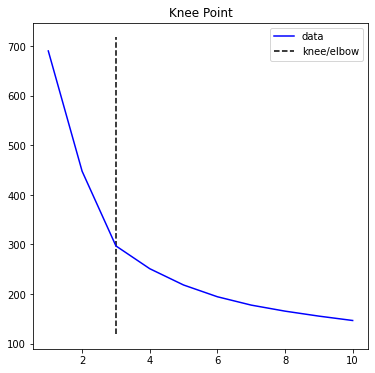

In [56]:
kneedle.plot_knee()

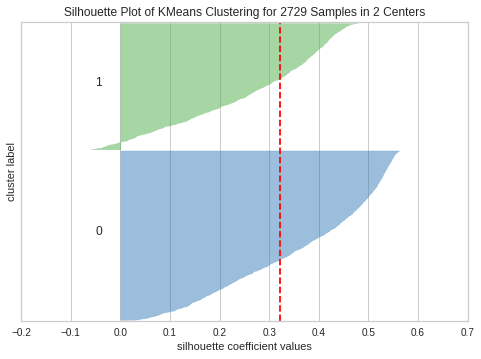

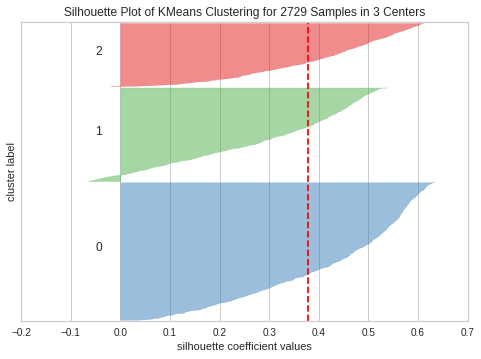

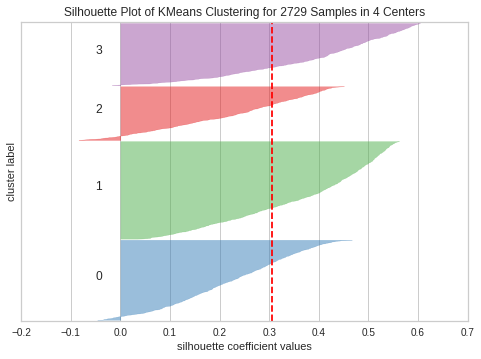

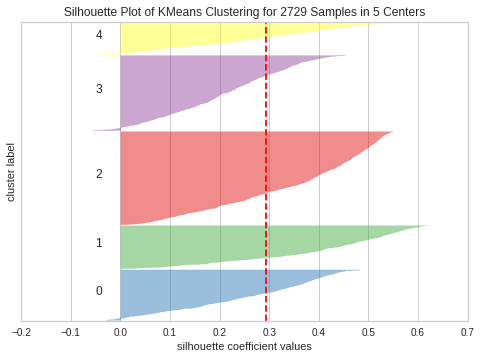

In [58]:
# SilhouetteVisualizer 사용하여 훈련과 그래프 한 번에 해겨하기
from yellowbrick.cluster import SilhouetteVisualizer

# 최소 2개 이상의 label/cluster가 존재해야함.
k_range = range(2, 6)
for i in k_range:
  km = KMeans(n_clusters = i, init="k-means++")
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

In [59]:
km = KMeans(n_clusters=3)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
# cluster의 변수별 중심점
user_metadata_cluster_centers = pd.DataFrame(km.cluster_centers_, columns=train_x.columns)
user_metadata_cluster_centers

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.729512,0.341638,0.113427,0.270488,0.197327,0.196706
1,0.620028,0.299342,0.146482,0.379972,0.650309,0.647359
2,0.302188,0.089989,0.044699,0.697812,0.303136,0.301840


In [61]:
user_metadata_label_df = train_x.copy()
user_metadata_label_df["label_from_km"] = km.labels_
user_metadata_label_df.groupby("label_from_km").count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,1275,1275,1275,1275,1275,1275
1,867,867,867,867,867,867
2,587,587,587,587,587,587


In [62]:
# 변수별 변동성 확인하기
user_metadata_cluster_centers.std()

birthday_year        0.221966
category_prefer      0.134750
recommended_cnt      0.051923
age                  0.221966
days_from_joined     0.236966
years_from_joined    0.235770
dtype: float64

In [63]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual_test", "K-means_cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"],
               y=user_metadata_label_df["days_from_joined"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [64]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means_cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"],
               y=user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [67]:
# 3D 시각화
fig = go.Figure(data=[go.Scatter3d(x=user_metadata_label_df["days_from_joined"],
                                   y=user_metadata_label_df["age"],
                                   z=user_metadata_label_df["category_prefer"],
                                   mode="markers",
                                   marker=dict(
                                            size=5,
                                            color=user_metadata_label_df["label_from_km"],
                                            opacity=0.7
                                        )
                                   )])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                      xaxis = dict(
                          title="days_from_joined"
                      ),
                      yaxis = dict(
                          title="age"
                      ),
                      zaxis = dict(
                          title="category_prefer"
                      ),
                  ),)
fig.show()

In [68]:
test_user_metadata_label_df = test_x.copy()
test_cluster = km.fit_predict(test_x)
test_user_metadata_label_df["label_from_km"] = test_cluster

In [70]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual", "K-means_cluster-test"))

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               ),
  row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"],
               y=test_user_metadata_label_df["age"],
               mode="markers",
               marker=dict(color=test_user_metadata_label_df["label_from_km"]),
               ),
  row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [71]:
# 훈련결과 label을 원데이터셋에 추가
trained_user_metadata_df = pd.concat([user_metadata_label_df, test_user_metadata_label_df])
trained_user_metadata_df = user_metadata_df.join(trained_user_metadata_df["label_from_km"])
trained_user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,0


### 고객 거래데이터 사용

In [72]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 4.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311702 sha256=b2096c490ce6fabf3e66d36dac5a41b87508a5e3856d5c03a637ab9c213ce5d1
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [73]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


In [75]:
user_stats_df.columns

Index(['user_id', 'membership_type', 'total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'last_date',
       'days_of_recency'],
      dtype='object')

In [76]:
# 수치화되지 않은 컬럼 제거하기
stats_columns = ['total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'days_of_recency']

X = user_stats_df[stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)
print(len(train_x), len(test_x))

2729 683


In [77]:
hdb_data_df = train_x.copy()

In [78]:
import hdbscan

In [83]:
# min_samples 파라미터를 비교하는 함수 만들기

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name = "hdbscan_label", x_col="total_order_cnt", y_col="total_cost"):
  for ms in ms_list:
    hdbscan_label = hdbscan.HDBSCAN(min_samples=ms, min_cluster_size=min_cluster_size, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세 확인
    hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_sample={ms} >> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
    fig.show()

    # 군집별 데이터 분포 확인
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)

  return data_df

In [85]:
ms_list = [50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name = "hdbscan_label", x_col="avg_cost", y_col="total_cost")

               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   46.851582  1.956295e+06     -810.840121      -0.932771   
0                    24.307692  7.781496e+05     -796.634884      -3.441173   
1                    11.206897  3.455941e+05     -585.448020      -9.499835   
2                     1.193401  3.402112e+04     -521.278352     -67.298350   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     2.292486           8.276683  43161.106277   
0                      1.700758           4.626282  34454.978974   
1                      1.372910           2.676149  33190.534655   
2                      1.038619           1.095593  29697.563304   

               avg_item_cost  days_of_recency  point_cnt  
hdbscan_label                                            

               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   52.377465  2.205364e+06     -847.438024      -0.845170   
0                    24.404762  7.796943e+05     -797.553904      -3.195375   
1                     1.642795  4.830265e+04     -523.555954     -64.401451   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     2.435355           9.103709  44222.305127   
0                      1.702604           4.670238  34841.737857   
1                      1.053798           1.172162  29924.110428   

               avg_item_cost  days_of_recency  point_cnt  
hdbscan_label                                             
-1              29128.974423       174.219718        355  
0               21477.534881       170.273810         84  
1               18702.57460

In [86]:
# HDBSCAN Model 원데이터 훈련시키기
ms = 50
hdbscan_label = hdbscan.HDBSCAN(min_samples=ms, min_cluster_size=30, prediction_data=True).fit_predict(train_x)
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

In [87]:
# outlier 추세 확인
hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outliers = hdbscan_case_dict[-1]

# 시각화
fig = px.scatter(hdb_data_df, x="avg_cost", y="total_cost", color="hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_sample={ms} >> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
fig.show()

# 군집별 데이터 분포 확인
hdb_cluster_df = hdb_data_df.groupby("hdbscan_label").mean()
hdb_cluster_df["point_cnt"] = hdb_data_df["hdbscan_label"].value_counts()
hdb_cluster_df

,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency,point_cnt
hdbscan_label,,,,,,,,,,
-1,46.851582,1.956295e+06,-810.840121,-0.932771,2.292486,8.276683,43161.106277,27881.302944,172.591241,411
0,24.307692,7.781496e+05,-796.634884,-3.441173,1.700758,4.626282,34454.978974,20712.827308,170.025641,78
1,11.206897,3.455941e+05,-585.448020,-9.499835,1.372910,2.676149,33190.534655,22289.787586,164.482759,58
2,1.193401,3.402112e+04,-521.278352,-67.298350,1.038619,1.095593,29697.563304,18609.610898,62.538955,2182


- 앞서 훈련시킨 내용 그대로 함수 내에서가 아닌 새로 모델까지 저장을 해주고
- 각 클러스터 마다 중심점을 출력하였음.
- 각 클러스터마다 포인트가 몇 개 있는지 확인 가능.